In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
fig_height_pt = 123
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio
fig_height_pt=fig_width_pt/golden_mean
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 6,
          'xtick.direction': 'out',
          'ytick.labelsize': 6,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.linspace(0,1,9)]) 

In [4]:
list_ly=[1,2,3,4,5,6]

In [5]:
rev_t={ly:[] for ly in list_ly}
for ly in list_ly:
    for i in range(16):
        try:
            tmp=np.loadtxt('instances_lx100/ly%d/i%d/f_rev_t.dat'%(ly,i))[1:]
            rev_t[ly]=np.concatenate([rev_t[ly], tmp])
        except:
            print(ly, i)

1 0
1 1
1 2
1 3
1 4


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "instances_lx100/ly2/i4/f_rev_t.dat"
  """
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "instances_lx100/ly5/i3/f_rev_t.dat"
  """


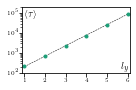

In [29]:
plt.plot((list_ly), np.exp(1.21*np.array(list_ly)+4.13), '--', color='black', linewidth=0.5)

plt.semilogy(list_ly, [np.mean(rev_t[ly]) for ly in list_ly], 'o', markersize=3)


plt.ylim(1e2, 2e5)
plt.xlim(0.9, 6.1)

plt.xticks(np.arange(1,7))

plt.xlabel(r'$l_y$', labelpad=-20, x=0.95, rotation=0, zorder=100);
plt.ylabel(r'$\langle \tau \rangle$', labelpad=-24, y=0.8, rotation=0, zorder=100);

plt.tight_layout(0.0)
plt.savefig('tau_ly.pdf');

In [19]:
np.polyfit(list_ly, np.log([np.mean(rev_t[ly]) for ly in list_ly]), 1)

array([1.21032672, 4.13268214])